In [1]:
import os
import re
import matplotlib.pyplot as plt

def extract_keff_and_error(file_path):
    with open(file_path, 'r') as f:
        for line in f:
            if 'ANA_KEFF' in line:
                try:
                    keff_val = float(line[47:58])
                    keff_err = float(line[59:66])
                    return keff_val, keff_err
                except ValueError:
                    pass
    return None, None

def get_numeric_suffix(filename):
    # Match something like: fission_blanket_hex_10_res.m → 10
    #match = re.search(r'fission_blanket_hex_(\d+)_res\.m$', filename)
    #match = re.search(r'input_(\d+)_(\d+)_(d+)\.txt_res\.m$', filename)
    #return int(match.group(1)) if match else float('inf')
    match = re.search(r'input(\d+)_15_(\d+)\.txt_res', filename)
    return match.group(1) if match else ""

def read_keff_from_folder(folder_path):
    keff_values = []
    keff_errors = []
    numeric_labels = []

    all_files = [f for f in os.listdir(folder_path) if f.endswith('_res.m')]
    sorted_files = sorted(all_files, key=get_numeric_suffix)

    for file_name in sorted_files:
        number = get_numeric_suffix(file_name)
        file_path = os.path.join(folder_path, file_name)
        keff, err = extract_keff_and_error(file_path)
        if keff is not None:
            keff_values.append(keff)
            keff_errors.append(err)
            numeric_labels.append(number)

    return numeric_labels, keff_values, keff_errors

def plot_keff(labels, keff_values, keff_errors):
    if not labels:
        print("[ERROR] No keff data found.")
        return
    plt.figure(figsize=(10, 5))
    plt.errorbar(labels, keff_values, yerr=keff_errors, fmt='o-', capsize=5)
    plt.xticks(labels)
    plt.xlabel('Reflector Thickness [cm]')
    plt.ylabel('keff')
    plt.title('Optimal Reflector Thickness')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Your folder here ===
folder_path = '/Users/maxle/Desktop/Desktop2/Dual/10_15_20' 


#labels, keff_values, keff_errors = read_keff_from_folder(folder_path)
#plot_keff(labels, keff_values, keff_errors)




In [8]:
import numpy as np

In [18]:
klist = []

In [19]:
range_outer = np.arange(10,110, 10)
range_inner = np.arange(10,50,10)


In [20]:
for i in range_outer:
     for j in range_inner:
          klist.append(read_keff_from_folder(f'/Users/maxle/Desktop/Desktop2/UO2/{i}_15_{j}')[1])
# klist.append(read_keff_from_folder('/Users/maxle/Desktop/Desktop2/UO2/10_15_40')[1])
print(klist)

[[0.751635], [0.813658], [0.839443], [0.841885], [0.838384], [0.893562], [0.91447], [0.916084], [0.89355], [0.943476], [0.966017], [0.967264], [0.932195], [0.976066], [0.996999], [0.999639], [0.957776], [0.998996], [1.01927], [1.02126], [0.977738], [1.01422], [1.03605], [1.03636], [0.987188], [1.02451], [1.04527], [1.04639], [0.997351], [1.03319], [1.05487], [1.05412], [1.00312], [1.03966], [1.059], [1.0602], [1.00792], [1.04204], [1.06406], [1.06502]]


In [21]:
innerlist = [10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40]

In [22]:
outerlist = [10, 10, 10, 10, 20, 20, 20, 20, 30, 30, 30, 30, 40, 40, 40, 40, 50, 50, 50, 50, 60, 60, 60, 60, 70, 70, 70, 70, 80, 80, 80, 80, 90, 90, 90, 90, 100, 100, 100, 100]

In [23]:
print(len(klist), len(innerlist), len(outerlist))

40 40 40


In [24]:

def cylvol(inner, outer, height = 100):
     fus_radius = 25 #25 cm of fusion core radius
     fis_radius = 15 #15 cm of fission blanket radius
     shell_vol = np.pi * height * (((inner + fus_radius)**2 - fus_radius**2) + ((outer + fis_radius + inner + fus_radius)**2 - (fis_radius + inner + fus_radius)**2))
     cap_vol = np.pi * 2 * outer * (outer + fis_radius + inner + fus_radius)**2
     tot_vol = shell_vol + cap_vol
     return tot_vol, shell_vol, cap_vol


In [25]:
volume_list = []
for i in range(len(klist)):
    volume_list.append(cylvol(innerlist[i], outerlist[i])[0])

In [26]:
print(klist)
print(volume_list)

[[0.751635], [0.813658], [0.839443], [0.841885], [0.838384], [0.893562], [0.91447], [0.916084], [0.89355], [0.943476], [0.966017], [0.967264], [0.932195], [0.976066], [0.996999], [0.999639], [0.957776], [0.998996], [1.01927], [1.02126], [0.977738], [1.01422], [1.03605], [1.03636], [0.987188], [1.02451], [1.04527], [1.04639], [0.997351], [1.03319], [1.05487], [1.05412], [1.00312], [1.03966], [1.059], [1.0602], [1.00792], [1.04204], [1.06406], [1.06502]]
[760265.42216873, 1156106.096521044, 1627344.9945595127, 2173982.1162841367, 1558229.9561805374, 2123716.6338267, 2777167.905773377, 3518583.772020568, 2620088.2730938876, 3380353.6952626174, 4241150.0823462205, 5202477.434344698, 3983539.484751858, 4963716.392671873, 6056990.636121121, 7263362.215099602, 5686282.702997526, 6911503.837897545, 8262388.678941157, 9738937.226128358, 7766017.039673968, 9261415.14278271, 10895043.322649403, 12666901.579274045, 10260441.606624264, 12051149.419170447, 13992653.679088939, 16084954.386379741, 132

In [27]:
def vol_to_tonne(volume, rho):
     tonnes = volume * rho * 1e-6
     return tonnes

In [28]:
tonne_list = []
for i in range(len(volume_list)):
     tonne_list.append(vol_to_tonne(volume_list[i], 1.7))
print(tonne_list)

[1.2924512176868408, 1.9653803640857745, 2.7664864907511713, 3.695769597683032, 2.6489909255069133, 3.6103182775053897, 4.72118543981474, 5.981592412434965, 4.454150064259609, 5.746601281946449, 7.2099551399885735, 8.844211638385985, 6.772017124078158, 8.438317867542183, 10.296884081405906, 12.347715765669323, 9.666680595095794, 11.749556524425824, 14.046060754199965, 16.556193284418207, 13.202228967445745, 15.744405742730608, 18.521573648503985, 21.533732684765873, 17.44275073126125, 20.48695401258976, 23.787511254451196, 27.344422456845557, 22.45233437667553, 26.04128982413651, 29.907962062174825, 34.05235109079048, 28.295068393821825, 32.4715016675041, 36.947014561808125, 41.72160707673388, 35.035041272833375, 39.841678032825754, 44.96875724348429, 50.416278904809005]


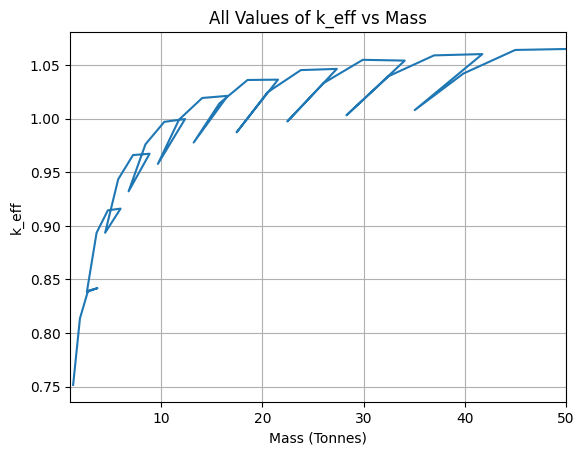

In [29]:
ax1 = plt.axes()
ax1.grid()
ax1.set_xlim(1, 50)
ax1.set_xlabel('Mass (Tonnes)')
ax1.set_ylabel('k_eff')
ax1.set_title('All Values of k_eff vs Mass')
ax1.plot(tonne_list, klist)

In [30]:
def remove_backtracking(list1, list2):
    """
    Removes entries from both lists that would cause backtracking in list1.
    Both lists must be of the same length.
    """
    if len(list1) != len(list2):
        raise ValueError("Lists must be of the same length")
    
    # Extract values from nested lists in list1
    values1 = [x[0] if isinstance(x, list) else x for x in list1]
    
    result1 = []
    result2 = []
    
    # Add the first point
    current_max = values1[0]
    result1.append(list1[0])
    result2.append(list2[0])
    
    # Check each subsequent point
    for i in range(1, len(values1)):
        if values1[i] > current_max:  # Only keep points that increase
            current_max = values1[i]
            result1.append(list1[i])
            result2.append(list2[i])
    
    return result1, result2

In [31]:
trim_list = klist
trim_volume = volume_list
trim_tonne = tonne_list

In [32]:
trim_list, trim_tonne = remove_backtracking(trim_list, trim_tonne)

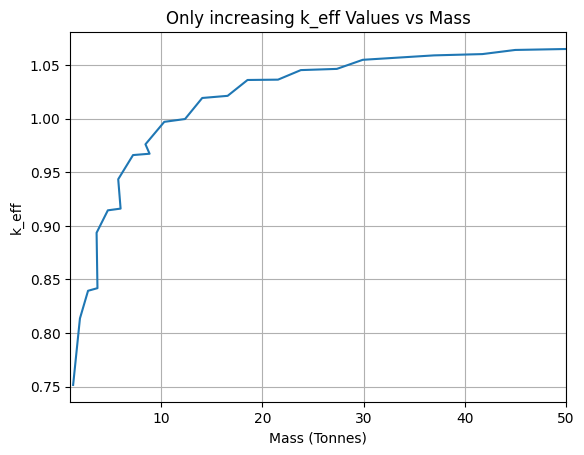

In [34]:
ax2 = plt.axes()
ax2.grid()
ax2.set_xlim(1, 50)
ax2.set_xlabel('Mass (Tonnes)')
ax2.set_ylabel('k_eff')
ax2.set_title('Only increasing k_eff Values vs Mass')
ax2.plot(trim_tonne, trim_list)

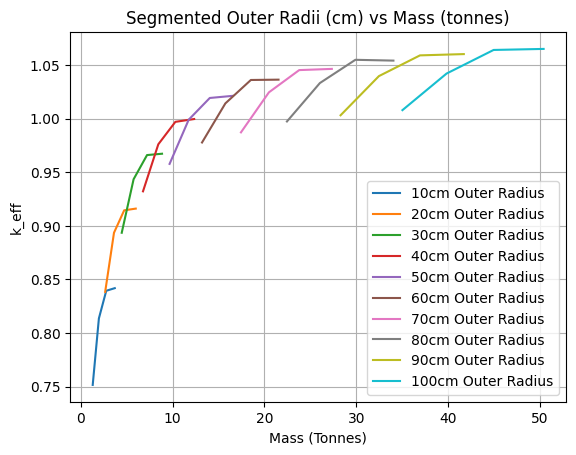

In [35]:
ax3 = plt.axes()
ax3.plot(tonne_list[:4], klist[:4], label = '10cm Outer Radius')
ax3.plot(tonne_list[4:8], klist[4:8], label = '20cm Outer Radius')
ax3.plot(tonne_list[8:12], klist[8:12], label = '30cm Outer Radius')
ax3.plot(tonne_list[12:16], klist[12:16], label = '40cm Outer Radius')
ax3.plot(tonne_list[16:20], klist[16:20], label = '50cm Outer Radius')
ax3.plot(tonne_list[20:24], klist[20:24], label = '60cm Outer Radius')
ax3.plot(tonne_list[24:28], klist[24:28], label = '70cm Outer Radius')
ax3.plot(tonne_list[28:32], klist[28:32], label = '80cm Outer Radius')
ax3.plot(tonne_list[32:36], klist[32:36], label = '90cm Outer Radius')
ax3.plot(tonne_list[36:40], klist[36:40], label = '100cm Outer Radius')
ax3.grid()
ax3.set_xlabel('Mass (Tonnes)')
ax3.set_ylabel('k_eff')
ax3.set_title('Segmented Outer Radii (cm) vs Mass (tonnes)')
ax3.legend()

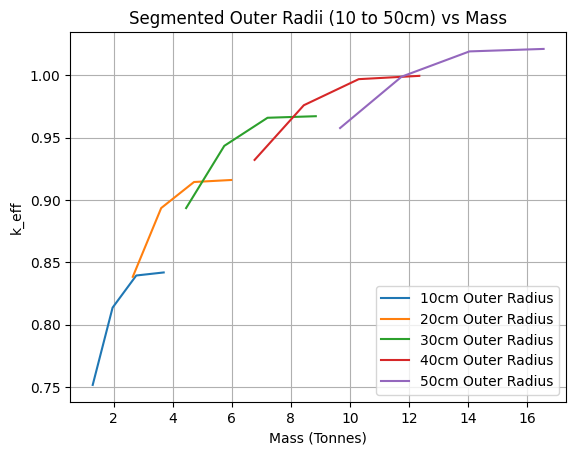

In [36]:
ax4 = plt.axes()
ax4.plot(tonne_list[:4], klist[:4], label = '10cm Outer Radius')
ax4.plot(tonne_list[4:8], klist[4:8], label = '20cm Outer Radius')
ax4.plot(tonne_list[8:12], klist[8:12], label = '30cm Outer Radius')
ax4.plot(tonne_list[12:16], klist[12:16], label = '40cm Outer Radius')
ax4.plot(tonne_list[16:20], klist[16:20], label = '50cm Outer Radius')
ax4.grid()
ax4.set_xlabel('Mass (Tonnes)')
ax4.set_ylabel('k_eff')
ax4.set_title('Segmented Outer Radii (10 to 50cm) vs Mass')
ax4.legend()

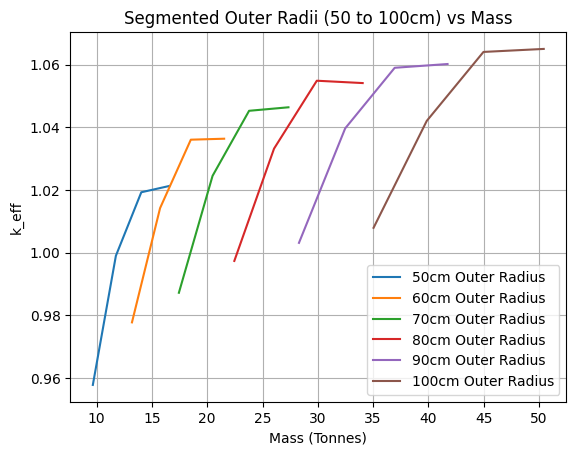

In [37]:
ax5 = plt.axes()
ax5.plot(tonne_list[16:20], klist[16:20], label = '50cm Outer Radius')
ax5.plot(tonne_list[20:24], klist[20:24], label = '60cm Outer Radius')
ax5.plot(tonne_list[24:28], klist[24:28], label = '70cm Outer Radius')
ax5.plot(tonne_list[28:32], klist[28:32], label = '80cm Outer Radius')
ax5.plot(tonne_list[32:36], klist[32:36], label = '90cm Outer Radius')
ax5.plot(tonne_list[36:40], klist[36:40], label = '100cm Outer Radius')
ax5.grid()
ax5.set_xlabel('Mass (Tonnes)')
ax5.set_ylabel('k_eff')
ax5.set_title('Segmented Outer Radii (50 to 100cm) vs Mass')
ax5.legend()

In [38]:
klist[13]

[0.976066]